<a href="https://colab.research.google.com/github/yashsingla984/CP-Vton-cloth-masking/blob/main/si1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/My\ Drive/shopcom


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
/content/gdrive/My Drive/shopcom


In [ ]:
! unzip 'Shopcom Hackathon Dataset.zip'



unzip:  cannot find or open Shopcom Hackathon Dataset.zip, Shopcom Hackathon Dataset.zip.zip or Shopcom Hackathon Dataset.zip.ZIP.


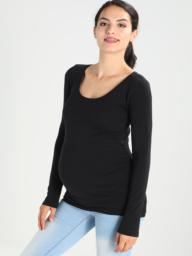

[[234 239 238]
 [234 239 238]
 [234 239 238]
 [234 239 238]
 [234 239 238]
 [234 239 238]
 [234 239 238]
 [234 239 238]
 [234 239 238]
 [234 239 238]
 [234 239 238]
 [234 239 238]
 [234 239 238]
 [234 239 238]
 [234 239 238]
 [233 240 237]
 [231 238 235]
 [232 242 236]
 [234 241 236]
 [226 233 228]
 [216 223 216]
 [210 217 210]
 [215 218 209]
 [221 222 213]
 [221 219 211]
 [220 217 209]
 [222 215 206]
 [222 215 206]
 [225 216 207]
 [225 216 207]
 [225 214 206]
 [225 213 203]
 [222 209 193]
 [223 209 191]
 [221 207 188]
 [220 206 187]
 [221 204 185]
 [220 203 182]
 [222 203 182]
 [222 204 181]
 [225 203 178]
 [229 207 182]
 [233 208 182]
 [226 201 175]
 [220 193 166]
 [220 193 166]
 [230 201 174]
 [237 210 183]
 [237 210 184]
 [230 205 179]
 [229 202 175]
 [230 203 176]
 [235 209 179]
 [240 214 184]
 [241 215 185]
 [238 214 184]
 [239 215 187]
 [237 216 188]
 [237 217 192]
 [238 223 197]
 [245 228 207]
 [251 238 216]
 [255 244 226]
 [255 248 234]
 [243 239 234]
 [241 239 238]
 [240 240 

In [ ]:
img = cv2.imread('000001_0.jpg') 
from google.colab.patches import cv2_imshow
# Displaying the image 
cv2_imshow( img)
print(img[255,])

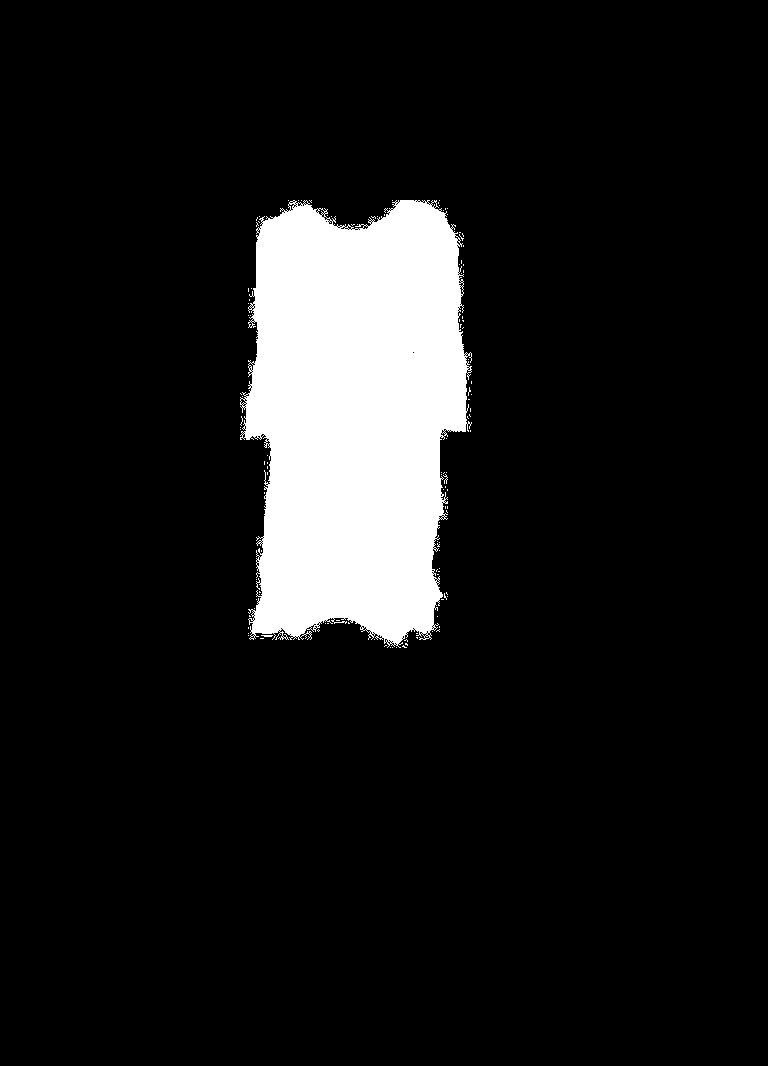

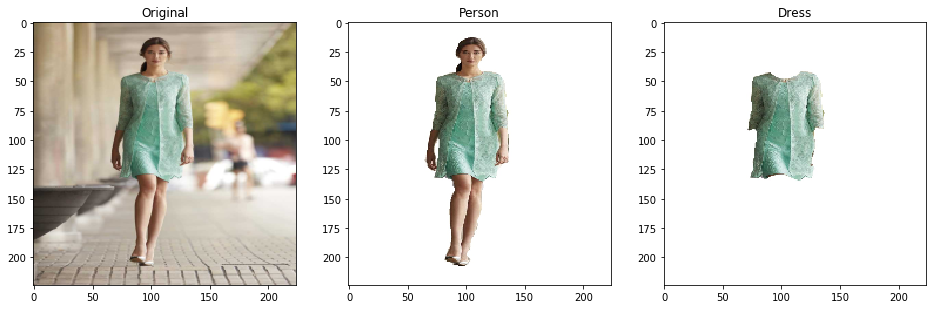

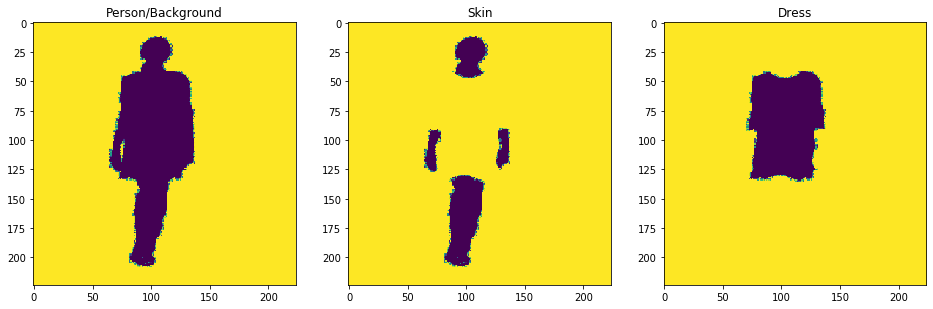

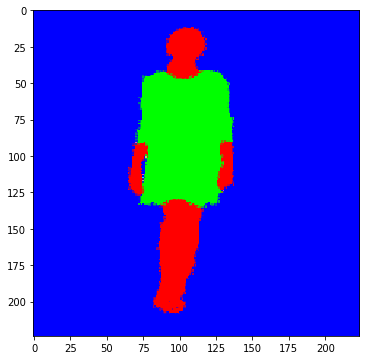

In [ ]:
import tensorflow as tf
from PIL import Image
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import imutils
import pickle
import tqdm

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, UpSampling2D, BatchNormalization, Activation, ReLU, Input, Dropout, MaxPooling2D, concatenate, Conv2DTranspose
from tensorflow.keras import backend as K
from tensorflow.keras import losses
from tensorflow.keras.optimizers import Adam
import os




original = cv.imread('./original77.jpg')
original = cv.resize(original,(224,224),interpolation = cv.INTER_AREA)
dress = cv.imread('./dress77.jpg')
dress = cv.resize(dress,(224,224))
body = cv.imread('./body77.jpg')
body = cv.resize(body,(224,224))

plt.figure(figsize=(16,8))
plt.subplot(1,3,1)
plt.title('Original')
plt.imshow(cv.cvtColor(original, cv.COLOR_BGRA2RGB))
plt.subplot(1,3,2)
plt.title('Person')
plt.imshow(cv.cvtColor(body, cv.COLOR_BGRA2RGB))
plt.subplot(1,3,3)
plt.title('Dress')
plt.imshow(cv.cvtColor(dress, cv.COLOR_BGRA2RGB))



dress = cv.imread('./dress77.jpg',0)
body = cv.imread('./body77.jpg',0)

### ENCODE DRESS ###
dress[dress == 255] = 0
dress[dress > 0] = 255
cv2_imshow(dress)
dress = cv.resize(dress,(224,224))

### ENCODE BODY ###
body[body == 255] = 0
body[body > 0] = 255
body = cv.resize(body,(224,224))

### ENCODE SKIN ###
skin = body - dress

plt.figure(figsize=(16,8))
plt.subplot(1,3,1)
plt.title('Person/Background')
bg = (255 - body)/255
plt.imshow(bg)
plt.subplot(1,3,2)
plt.title('Skin')
skin = (255 - skin)/255
plt.imshow(skin)
plt.subplot(1,3,3)
plt.title('Dress')
dress = (255 - dress)/255
plt.imshow(dress)




### COMBINE BACKGROUND, SKIN, DRESS ###
gt = np.zeros((224,224,3))
gt[:,:,0] = (1-skin)
gt[:,:,1] = (1-dress)
gt[:,:,2] = bg

plt.figure(figsize=(6,6))
plt.imshow(gt)